In [1]:
import numpy as np
import cv2
import random
import os
import pickle
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Flatten,MaxPooling2D

KeyboardInterrupt: 

In [4]:
DIRECTORY = r'C:\SUDHARSHAN\Machine Learning\archive\dogscats\train';
CATEGORIES = ['cats','dogs'];


In [ ]:
IMG_SIZE =100

data = []

for category in CATEGORIES:
    folder = os.path.join(DIRECTORY,category)
    label = CATEGORIES.index(category)
    for img in os.listdir(folder):
        img_path = os.path.join(folder, img)
        img_arr = cv2.imread(img_path)
        img_arr = cv2.resize(img_arr , (IMG_SIZE , IMG_SIZE))
        data.append([img_arr , label])

In [6]:
DIRECTORY2 = r'C:\SUDHARSHAN\Machine Learning\archive\dogscats\valid'
CATEGORIES2 = ['cats','dogs']

IMG_SIZE =100

data2 = []

for category in CATEGORIES2:
    folder2 = os.path.join(DIRECTORY2,category)
    label2 = CATEGORIES2.index(category)
    for img in os.listdir(folder2):
        img_path2 = os.path.join(folder2, img)
        img_arr2 = cv2.imread(img_path2)
        img_arr2 = cv2.resize(img_arr2 , (IMG_SIZE , IMG_SIZE))
        data2.append([img_arr2 , label2])

In [7]:
len(data)


23000

In [8]:
random.shuffle(data)

In [9]:
X_train = []
Y_train = []

for features,labels in data:
    X_train.append(features)
    Y_train.append([labels])
X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [10]:
X_test = []
Y_test = []

for features2,labels2 in data2:
    X_test.append(features2)
    Y_test.append([labels2])
X_test = np.array(X_test)
Y_test = np.array(Y_test)

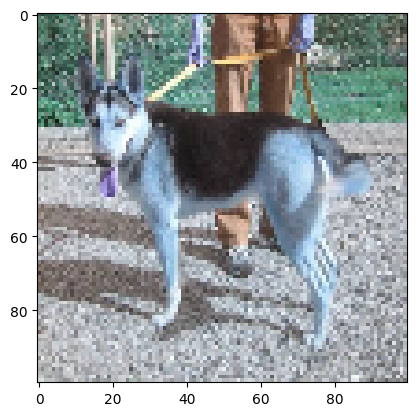

In [11]:
idx = random.randint(0,len(X_test))
plt.imshow(X_train[idx, :])

In [12]:
model = Sequential([
    Conv2D(32,(3,3),activation = 'relu',input_shape = (100,100,3)),
    MaxPooling2D((2,2)),
    
    Conv2D(32,(3,3), activation = 'relu'),
    MaxPooling2D((2,2)),
    
    Flatten(),
    Dense(64 , activation = 'relu'),
    Dense(1 , activation = 'sigmoid')
    ])
    

In [13]:
model.compile(loss = 'binary_crossentropy' , optimizer = 'adam' , metrics = ['accuracy'])

In [17]:
model.fit(X_train , Y_train , epochs = 1, batch_size =64)

360/360 [==============================] - 715s 2s/step - loss: 0.6638 - accuracy: 0.5959


In [18]:
model.evaluate(X_test,Y_test)

63/63 [==============================] - 21s 322ms/step - loss: 0.6609 - accuracy: 0.6530


[0.6609264016151428, 0.652999997138977]

In [3]:
idx2= random.randint(0, len(Y_test))
plt.imshow(X_test[idx2, :])
plt.show()

y_pred = model.predict(X_test[idx2, :].reshape(1,100,100,3))
y_pred = y_pred >0.5

if(y_pred == 0):
    pred ='cat'
else:
    pred = 'dog'
    
print("It is a ",pred)

NameError: name 'Y_test' is not defined